# **YOLO v5 모델로 히잡, 마스크 객체 감지 실습**

*   고영민 (https://psleon.tistory.com/)



In [2]:
# install YOLO v5
!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


# 1. **데이터셋 준비**

In [2]:
!pip install -r ./yolov5/requirements.txt

     -------------------------------------- 184.3/184.3 kB 5.6 MB/s eta 0:00:00
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
     ------------------------------------- 612.6/612.6 kB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00


In [1]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: DA31-0DB6

 C:\Users\User\Desktop\ObjectDetection 디렉터리

2023-06-29  오후 05:40    <DIR>          .
2023-06-29  오후 05:31    <DIR>          ..
2023-06-28  오후 08:12    <DIR>          .ipynb_checkpoints
2023-06-28  오후 08:26    <DIR>          hijab
2023-06-28  오후 08:57               109 hijab.yaml
2023-06-29  오후 05:40           881,177 Object_Detection_with_YOLO_v5_hijab.ipynb
2023-06-28  오후 08:25               369 readme.txt
2023-06-28  오후 08:54    <DIR>          yolov5
2023-06-28  오후 08:57        14,808,437 yolov5s.pt
               4개 파일          15,690,092 바이트
               5개 디렉터리  414,357,032,960 바이트 남음


In [2]:
!type hijab.yaml

names:
- burqz
- chador
- mask
- niqab
nc: 4
train: ../hijab/images/train/
val: ../hijab/images/val/


In [3]:
import yaml

with open('hijab.yaml', 'r') as f:
  data = yaml.full_load(f)

print(data)

data['train'] = '../hijab/images/train/'
data['val'] = '../hijab/images/val/'

with open('hijab.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['burqz', 'chador', 'mask', 'niqab'], 'nc': 4, 'train': '../hijab/images/train/', 'val': '../hijab/images/val/'}
{'names': ['burqz', 'chador', 'mask', 'niqab'], 'nc': 4, 'train': '../hijab/images/train/', 'val': '../hijab/images/val/'}


# **2.모델 학습**
* data : data yaml 파일 경로 (데이터셋 정보가 적힌 yaml 파일)
* weights : Pre-Trained 모델 파일 경로 (pt 형식 파일), 아무런 값을 적지 않으면 (‘’) 랜덤한 weight 값으로 초기화 및 학습 진행
* epochs : epoch 수
* batch : batch_size
* cfg : yolo v5 아키텍쳐 yaml 파일 경로 yolo v5는 s, m, l, x의 4가지 버전이 있음
  * s가 가장 가벼운 모델 x가 가장 무거운 모델 당연히 s가 성능이 제일 낮지만 FPS가 가장 높고, x가 성능이 제일 높지만 FPS는 가장 낮다.

In [7]:
#%pwd

!python ./yolov5/train.py --img 640 --batch 16 --epochs 100 --data hijab.yaml --cfg ./yolov5/models/yolov5s.yaml --weights yolov5s.pt --name hijab_yolov5s_results

train: weights=yolov5s.pt, cfg=./yolov5/models/yolov5s.yaml, data=hijab.yaml, hyp=yolov5\data\hyps\hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5\runs\train, name=hijab_yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-187-g0004c74 Python-3.10.9 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

학습이 끝난 모델은 ./yolov5/runs/ 내에 train.py ~ --name으로 지정해준 이름의 디렉터리에 저장된다.
본 연습에서는 ./yolov5/runs/train/hijab_yolov5s_results/ 디렉터리에 저장되며 해당 경로에 results.png를 통해 학습 결과를 볼 수 있다. 

### 텐서보드로 학습 결과 보기

In [5]:
%load_ext tensorboard
%tensorboard --logdir ./yolov5/runs/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 17796), started 0:13:47 ago. (Use '!kill 17796' to kill it.)

# 3. **모델 검증**

학습한 모델 가중치는 /content/yolov5/runs/train/hijab_yolov5s_results/weights/best.pt에 저장되며 이를 이용해 모델을 검증한다.

In [8]:
!python ./yolov5/val.py --data ./hijab.yaml --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt

val: data=./hijab.yaml, weights=['./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-187-g0004c74 Python-3.10.9 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning C:\Users\User\Desktop\ObjectDetection\hijab\labels\val\burqz...:   0%|          | 0/52 [00:00<?, ?it/s]
val: Scanning C:\Users\User\Desktop\ObjectDetection\hijab\labels\val\burqz... 1 images, 0 backgrounds, 0 corrupt:   2%|1         | 1/52 [00:04<04:10,  4.92s/it]
val: Scanning C:\Users\User\Desktop\ObjectDetection\hijab\labels\val\burqz... 52 images, 0 backgrounds, 0 corrupt: 100%|##########| 52/52 [00:04<00:00, 10.44it/s]
val: WARNING  Cache d

검증 결과는 /runs/val/exp/ 에 저장된다.

# 4. **모델 예측**
* source : 테스트 이미지 (혹은 폴더) 경로
* weights : 학습이 완료된 weight 파일 경로 (pt 형식)
* conf : conf_threshold 값 (0 ~ 1 사이의 값)으로

class score가 설정한 값을 넘겨야, 바운딩 박스를 그린다.<br>
runs/detect/exp 경로에 결과가 저장된다.<br>
예측을 반복하면 runs/detect 경로에 exp1, 2, 3… 같은 형태로 폴더가 생성되면서 결과가 기록된다.

In [9]:
from glob import glob
test_img_list = glob('./hijab/images/test/**/*.jpeg', recursive=True)
test_img_list2 = glob('./hijab/images/test/**/*.jpg', recursive=True)
print("length:", len(test_img_list), len(test_img_list2))
print(test_img_list)
print(test_img_list2)

test_dataset = test_img_list + test_img_list2
print(len(test_dataset))

length: 48 9
['./hijab/images/test\\all\\burqz_80.jpeg', './hijab/images/test\\all\\burqz_81.jpeg', './hijab/images/test\\all\\burqz_82.jpeg', './hijab/images/test\\all\\burqz_83.jpeg', './hijab/images/test\\all\\burqz_84.jpeg', './hijab/images/test\\all\\burqz_85.jpeg', './hijab/images/test\\all\\burqz_86.jpeg', './hijab/images/test\\all\\burqz_87.jpeg', './hijab/images/test\\all\\burqz_88.jpeg', './hijab/images/test\\all\\burqz_89.jpeg', './hijab/images/test\\burqz\\80.jpeg', './hijab/images/test\\burqz\\81.jpeg', './hijab/images/test\\burqz\\82.jpeg', './hijab/images/test\\burqz\\83.jpeg', './hijab/images/test\\burqz\\84.jpeg', './hijab/images/test\\burqz\\85.jpeg', './hijab/images/test\\burqz\\86.jpeg', './hijab/images/test\\burqz\\87.jpeg', './hijab/images/test\\burqz\\88.jpeg', './hijab/images/test\\burqz\\89.jpeg', './hijab/images/test\\chador\\80.jpeg', './hijab/images/test\\chador\\81.jpeg', './hijab/images/test\\chador\\82.jpeg', './hijab/images/test\\chador\\83.jpeg', './hij

In [10]:
import os
from IPython.display import Image

detect: weights=['./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt'], source=./hijab/images/test\mask\m80.jpeg, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-187-g0004c74 Python-3.10.9 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\User\Desktop\ObjectDetection\hijab\images\test\mask\m80.jpeg: 352x640 1 mask, 66.1ms
Speed: 0.0ms pre-process, 66.1ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5\runs\detect\exp


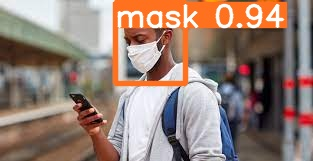

In [12]:
val_img_path = test_dataset[30]
!python ./yolov5/detect.py --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt --source "{val_img_path}"
Image(os.path.join('./yolov5/runs/detect/exp/', os.path.basename(val_img_path)))

detect: weights=['./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt'], source=./hijab/images/test\burqz\84.jpeg, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-187-g0004c74 Python-3.10.9 torch-2.0.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\User\Desktop\ObjectDetection\hijab\images\test\burqz\84.jpeg: 640x288 1 burqz, 46.9ms
Speed: 0.0ms pre-process, 46.9ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5\runs\detect\exp2


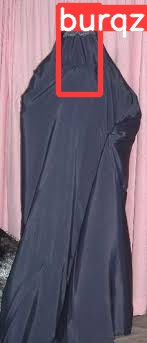

In [13]:
val_img_path = test_dataset[14]
!python ./yolov5/detect.py --weights ./yolov5/runs/train/hijab_yolov5s_results/weights/best.pt --source "{val_img_path}"
Image(os.path.join('./yolov5/runs/detect/exp2/', os.path.basename(val_img_path)))